In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

## Ирисы Фишера

### Работа с датасетом

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
X_train[:10]

array([[-1.26418478e+00, -1.31979479e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -1.31979479e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-5.25060772e-02, -8.22569778e-01,  8.07091462e-02,
         8.77547895e-04],
       [-1.14301691e+00,  1.24920112e+00, -1.34022653e+00,
        -1.44707648e+00],
       [ 1.03800476e+00, -1.28296331e+00,  1.16062026e+00,
         7.90670654e-01],
       [ 1.03800476e+00,  5.58610819e-01,  1.10378283e+00,
         1.18556721e+00],
       [ 5.53333275e-01, -1.28296331e+00,  6.49083415e-01,
         3.95774101e-01],
       [ 3.10997534e-01, -1.31979479e-01,  6.49083415e-01,
         7.90670654e-01]])

In [3]:
y_train[:10]

array([0, 0, 0, 0, 1, 0, 2, 2, 1, 2])

### Работа с нейронной сетью

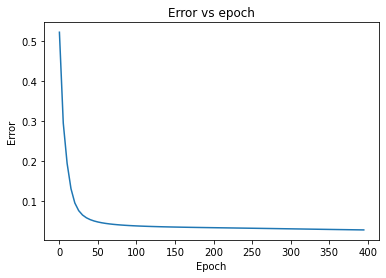

[[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

Wall time: 6.89 s


In [4]:
%%time
import sys
sys.path.append('../modules')

from NeuralNetworkClassifier import NeuralNetworkClassifier
from NeuralNetworkClassifier import ActivationFunction
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

network = NeuralNetworkClassifier([3], [ActivationFunction.sigmoid] * 2)
network.fit(X_train, y_train, learn_rate=0.1, epochs=400, plot_err_fun=True)
y_pred_outputs = network.predict(X_test)
y_pred = [y.argmax() for y in y_pred_outputs]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


## Титаник

### Работа с датасетом

In [5]:
train = pd.read_csv('../data/titanic/train.csv')
test = pd.read_csv('../data/titanic/test.csv')

y_train = train['Survived']
y_test = pd.read_csv('../data/titanic/gender_submission.csv').Survived

train = train.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived', 'Embarked'])
test = test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'])
print(pd.isna(train).any(axis=0))
print()
print(pd.isna(test).any(axis=0))

Pclass    False
Sex       False
Age        True
SibSp     False
Parch     False
Fare      False
dtype: bool

Pclass    False
Sex       False
Age        True
SibSp     False
Parch     False
Fare       True
dtype: bool


In [6]:
train['Age'] = train.Age.fillna((train.Age.mean() + test.Age.mean()) / 2)
train['Fare'] = train.Fare.fillna((train.Fare.mean() + test.Fare.mean()) / 2)
train = train.dropna()
test['Age'] = test.Age.fillna((train.Age.mean() + test.Age.mean()) / 2)
test['Fare'] = test.Fare.fillna((train.Fare.mean() + test.Fare.mean()) / 2)

print(pd.isna(train).any(axis=0))
print()
print(pd.isna(test).any(axis=0))

Pclass    False
Sex       False
Age       False
SibSp     False
Parch     False
Fare      False
dtype: bool

Pclass    False
Sex       False
Age       False
SibSp     False
Parch     False
Fare      False
dtype: bool


In [7]:
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

scaler = StandardScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

X_train = train
X_test = test

X_train[10:]

array([[ 0.82737724, -1.98196551,  0.43279337,  0.76762988, -0.31217238,
        -1.35557354],
       [-1.56610693,  2.1734084 , -0.4745452 , -0.47367361, -0.11384571,
        -1.35557354],
       [ 0.82737724, -0.75074361, -0.4745452 , -0.47367361, -0.48633742,
         0.73769513],
       ...,
       [ 0.82737724,  0.01768152,  0.43279337,  2.00893337, -0.17626324,
        -1.35557354],
       [-1.56610693, -0.2890354 , -0.4745452 , -0.47367361, -0.04438104,
         0.73769513],
       [ 0.82737724,  0.17267281, -0.4745452 , -0.47367361, -0.49237783,
         0.73769513]])

In [8]:
y_train[:10]

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64

### Работа с нейронной сетью

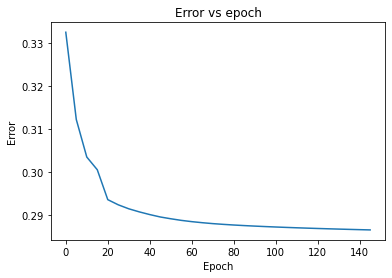

[[261   5]
 [ 70  82]]
              precision    recall  f1-score   support

           0       0.79      0.98      0.87       266
           1       0.94      0.54      0.69       152

    accuracy                           0.82       418
   macro avg       0.87      0.76      0.78       418
weighted avg       0.84      0.82      0.81       418

Wall time: 1min 15s


In [9]:
%%time

network = NeuralNetworkClassifier([3], [ActivationFunction.hyperbolic_tangent] * 2)
network.fit(X_train, y_train, learn_rate=0.1, epochs=150, plot_err_fun=True)
y_pred_outputs = network.predict(X_test)
y_pred = [y.argmax() for y in y_pred_outputs]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## Цифры

### Работа с датасетом

In [10]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
X_train[:3]

array([[ 0.        , -0.33501649,  0.58803248,  0.98034282,  0.96867267,
         1.09767273, -0.40972392, -0.12502292, -0.05907756, -0.62400926,
         0.66747815,  0.00517797, -0.05842586,  0.96246672, -0.51499146,
        -0.13043338, -0.04462507, -0.72764628, -1.2133854 , -0.68828364,
         0.47004443,  0.35406693, -0.54880546, -0.11422184, -0.03337973,
        -0.78510524, -1.46862699, -0.13965773,  0.98740215, -0.43459527,
        -0.62889588, -0.04723238,  0.        , -0.67237227, -1.21260656,
        -0.33060525,  0.96064411, -0.46754324, -0.82269451,  0.        ,
        -0.06134367, -0.5312841 , -0.44085212, -1.12245711, -0.1074235 ,
         1.01221528, -0.79827225, -0.08874162, -0.03543326,  0.74211893,
         1.50507822, -0.86867056,  0.11012973,  1.20101872, -0.75743581,
        -0.20978513, -0.02359646, -0.29908135,  0.28273565,  0.89424571,
         0.84963214,  0.03999823, -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.25345218,  0.03864775,  0.

In [11]:
y_train[:10]

array([3, 9, 1, 3, 1, 9, 4, 4, 2, 8])

In [12]:
# Будем предсказывать цифры
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Работа с нейронной сетью

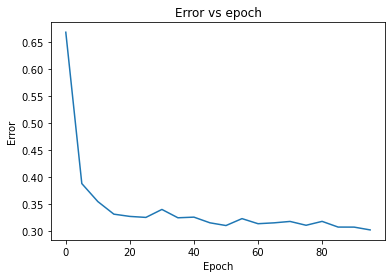

[[32  0  0  0  0  0  2  2  0  0]
 [ 0 31  2  0  0  1  0  0  0  2]
 [ 0  2 30  3  0  0  0  0  0  0]
 [ 0  3  0 31  0  0  0  0  0  3]
 [ 0  3  0  0  0 31  2  0  0  0]
 [ 0  0  0  0  0 31  3  2  0  1]
 [ 0  1  0  0  0  5 30  0  0  0]
 [ 0  0  0  1  0  2  0 28  0  5]
 [ 0 30  3  0  0  1  0  0  0  1]
 [ 0  4  0  5  0  0  0  1  0 26]]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        36
           1       0.42      0.86      0.56        36
           2       0.86      0.86      0.86        35
           3       0.78      0.84      0.81        37
           4       0.00      0.00      0.00        36
           5       0.44      0.84      0.57        37
           6       0.81      0.83      0.82        36
           7       0.85      0.78      0.81        36
           8       0.00      0.00      0.00        35
           9       0.68      0.72      0.70        36

    accuracy                           0.66       360
   macro avg       

C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
%%time

network = NeuralNetworkClassifier([3], [ActivationFunction.hyperbolic_tangent, ActivationFunction.sigmoid])
network.fit(X_train, y_train, learn_rate=0.1, epochs=100, plot_err_fun=True)
y_pred_outputs = network.predict(X_test)
y_pred = [y.argmax() for y in y_pred_outputs]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



## Вина

### Работа с датасетом

In [14]:
wine = datasets.load_wine()
X = wine.data
y = wine.target

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
X_train[:3]

array([[-1.43367073, -1.29833358,  0.78035368, -0.44890919, -0.40313502,
        -0.15240153,  0.18144724, -1.14303148,  1.33000903, -0.86863941,
        -0.7346574 ,  0.6614676 , -0.72254016],
       [ 1.38273339, -0.76871232, -0.17003496, -0.80925118, -0.33292168,
        -0.15240153,  0.40231992, -0.82071924, -0.03661659, -0.02512794,
         0.93253131,  0.29423247,  1.69767508],
       [ 0.71569031,  0.21871714,  1.18244118,  1.50294326,  0.36921172,
        -1.19391704, -1.19398717,  0.22679555, -0.08917911,  1.5580782 ,
        -0.95402434, -1.1464592 ,  0.0098934 ]])

In [15]:
y_train[:10]

array([1, 0, 2, 2, 1, 0, 1, 1, 0, 1])

### Работа с нейронной сетью

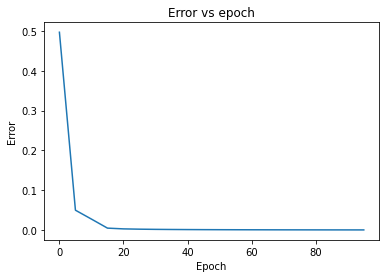

[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Wall time: 12.1 s


In [16]:
%%time
network = NeuralNetworkClassifier([2, 2], [ActivationFunction.hyperbolic_tangent] * 3)
network.fit(X_train, y_train, learn_rate=0.1, epochs=100, plot_err_fun=True)
y_pred_outputs = network.predict(X_test)
y_pred = [y.argmax() for y in y_pred_outputs]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
